# Import libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from scipy import stats

ModuleNotFoundError: No module named 'google.protobuf'

# Prepare datasets

In [3]:
df_x = pd.read_csv('../data/dataset_01/data.csv')
df_y = pd.read_csv('../data/dataset_01/answer.csv')

In [4]:
df_x

,0,1,2,3,4,5,6,7,8,9,...,662,663,664,665,666,667,668,669,670,671
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,12.0,9.0,4.0,3.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,0.0,0.0,20.0,14.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,21.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,18.0,0.0,6.0,0.0,12.0,0.0,0.0,0.0
2496,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,13.0,10.0,15.0,0.0,0.0,0.0
2497,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.0,0.0,4.0,0.0,4.0,5.0,0.0,0.0,11.0,7.0
2498,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.0,0.0,0.0,12.0,19.0,2.0,0.0,0.0,1.0,0.0


In [5]:
df_y

,x1,y1,z1,x2,y2,z2
0,1.62606,-0.801,4.74964,7.60840,26.812,2.75866
1,6.54501,-0.801,4.20302,2.13407,26.812,3.88737
2,3.46594,26.812,2.80550,5.76182,-0.801,2.63862
3,5.28630,-0.801,5.03381,7.38835,26.812,3.39033
4,2.71396,26.812,4.48287,2.39695,-0.801,2.70770
...,...,...,...,...,...,...
2495,7.75790,-0.801,4.62405,6.93627,26.812,2.88103
2496,5.54549,-0.801,4.11952,2.97840,26.812,3.58746
2497,5.59828,26.812,3.78629,2.16425,-0.801,3.33187
2498,6.80879,-0.801,5.00507,2.30580,26.812,2.72997


In [6]:
X_train, X_rem, y_train, y_rem = train_test_split(df_x, df_y, train_size=0.8)

X_valid, X_test, y_valid, y_test = train_test_split(X_rem,
                                                    y_rem,
                                                    test_size=0.5)

In [7]:
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(2000, 672)
(2000, 6)
(250, 672)
(250, 6)
(250, 672)
(250, 6)


(None, None)

# Some diagrams

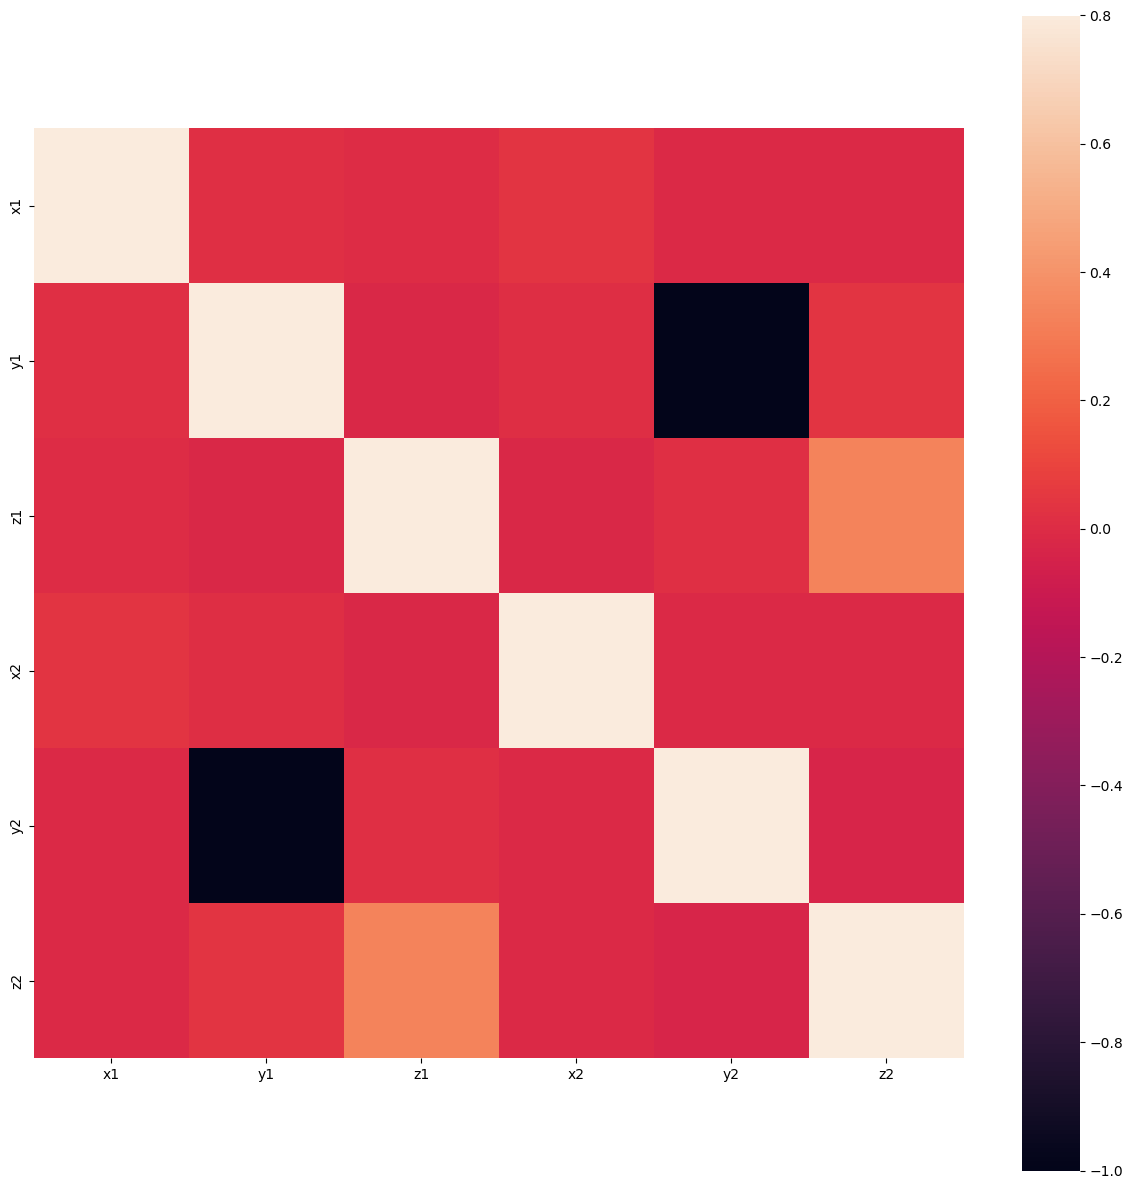

In [8]:
# вышло бесполезно пока, но я попробовал
c_mat = df_y.corr()
fir = plt.figure(figsize=(15, 15))

sb.heatmap(c_mat, vmax=.8, square=True)
plt.show()

# First NN (preceptron)

In [78]:
model = keras.Sequential([
    keras.Input(shape=(672, 1)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(6, activation='linear'),
])

In [70]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.MeanSquaredError()])

In [71]:
checkpoint_name = 'weights/Weights-{epoch:03d}--{val_loss:.5f}.hdf5'
checkpoint = keras.callbacks.ModelCheckpoint(checkpoint_name,
                                             monitor='val_loss',
                                             verbose=1,
                                             save_best_only=True,
                                             mode='auto')
callbacks_list = [checkpoint]

In [20]:
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=50,
                    verbose=0,
                    validation_data=(X_valid, y_valid))  # ,
# callbacks=callbacks_list)

In [21]:
history.history

{'loss': [120.64645385742188,
  56.30782699584961,
  33.256065368652344,
  22.321170806884766,
  15.127167701721191,
  11.158048629760742,
  8.743058204650879,
  7.135004043579102,
  6.226810455322266,
  5.185906410217285,
  4.448009967803955,
  3.9322752952575684,
  3.47953462600708,
  3.103102684020996,
  2.778594970703125,
  2.566861391067505,
  2.3594446182250977,
  2.127051591873169,
  1.9593608379364014,
  1.8499882221221924,
  1.7502447366714478,
  1.736466407775879,
  1.560158371925354,
  1.4054943323135376,
  1.2935701608657837,
  1.1918413639068604,
  1.108461856842041,
  1.0786526203155518,
  1.0308068990707397,
  1.0177923440933228,
  0.9003455638885498,
  0.8260626196861267,
  0.7301470041275024,
  0.6920977830886841,
  0.6650035381317139,
  0.6306275725364685,
  0.6014245748519897,
  0.5285136699676514,
  0.5550559759140015,
  0.5754742622375488,
  0.5519822239875793,
  0.6084041595458984,
  0.5384311676025391,
  0.44857195019721985,
  0.4062502384185791,
  0.386449277400

Text(0.5, 0, 'Номер эпохи')

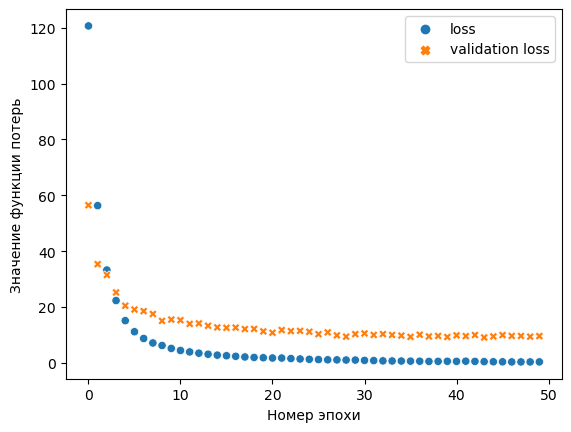

In [25]:
sb.scatterplot(
    {'loss': history.history['loss'], 'validation loss': history.history['val_loss']})
plt.ylabel("Значение функции потерь")
plt.xlabel("Номер эпохи")

<AxesSubplot:>

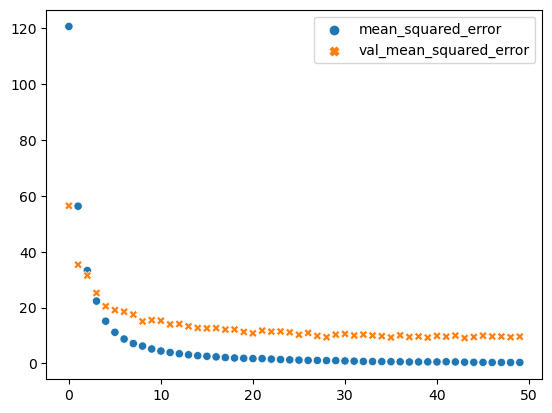

In [23]:
sb.scatterplot({'mean_squared_error': history.history['mean_squared_error'],
               'val_mean_squared_error': history.history['val_mean_squared_error']})

In [83]:
# Load wights file of the best model :
wights_file = '../logs/weights_model_01/Weights-049--17.80290.hdf5'  # choose the best checkpoint
model.load_weights(wights_file)  # load it
model.compile(loss=keras.losses.MeanSquaredError(
), optimizer=keras.optimizers.Adam(), metrics=[keras.metrics.MeanSquaredError()])

In [84]:
model.summary(expand_nested=True)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 672)               0         
                                                                 
 dense_21 (Dense)            (None, 256)               172288    
                                                                 
 dense_22 (Dense)            (None, 128)               32896     
                                                                 
 dense_23 (Dense)            (None, 64)                8256      
                                                                 
 dense_24 (Dense)            (None, 64)                4160      
                                                                 
 dense_25 (Dense)            (None, 64)                4160      
                                                                 
 dense_26 (Dense)            (None, 64)               

In [85]:
for i, layer in enumerate(model.layers):
    print(i, layer)
    try:
        print("    ", layer.activation)
    except AttributeError:
        print('   no activation attribute')

0 <keras.layers.reshaping.flatten.Flatten object at 0x7fbcbc0bddf0>
   no activation attribute
1 <keras.layers.core.dense.Dense object at 0x7fbcbc10f6d0>
     <function relu at 0x7fbcc01505e0>
2 <keras.layers.core.dense.Dense object at 0x7fbcbc10faf0>
     <function relu at 0x7fbcc01505e0>
3 <keras.layers.core.dense.Dense object at 0x7fbcbc0c7bb0>
     <function relu at 0x7fbcc01505e0>
4 <keras.layers.core.dense.Dense object at 0x7fbcbc0c7280>
     <function relu at 0x7fbcc01505e0>
5 <keras.layers.core.dense.Dense object at 0x7fbcbc0c7430>
     <function relu at 0x7fbcc01505e0>
6 <keras.layers.core.dense.Dense object at 0x7fbcbc0c7730>
     <function relu at 0x7fbcc01505e0>
7 <keras.layers.core.dense.Dense object at 0x7fbcbc0c7a30>
     <function linear at 0x7fbcc0154040>


# Check accuracy

In [86]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

8/8 [==============================] - 0s 2ms/step - loss: 1.6711 - mean_squared_error: 1.6711
Test loss: 1.6711068153381348
Test accuracy: 1.6711068153381348


In [76]:
def to_spherical(coor):
    vector = np.array(
        [(coor[3]-coor[0]), (coor[4]-coor[1]), (coor[5]-coor[2])])
    vectorsphere = np.array([np.sqrt((vector**2).sum()), (np.arctan(np.sqrt(
        coor[0]**2 + coor[1]**2)/coor[2])*180/np.pi), (np.arctan(coor[1]/coor[0])*180/np.pi)])
    return vectorsphere

In [77]:
xtr = model.predict(X_train.iloc[:1])
xtr

1/1 [==============================] - 0s 80ms/step


array([[ 1.115236 , 26.631414 ,  4.094659 ,  7.047685 , -1.2362967,
         2.7913187]], dtype=float32)

In [19]:
to_spherical(np.array(xtr)[0])

array([28.52195549, 81.26659004, 87.6020392 ])

In [20]:
np.array(xtr)[0]

array([ 1.115236 , 26.631414 ,  4.094659 ,  7.047685 , -1.2362967,
        2.7913187], dtype=float32)

In [21]:
ytr = y_train.iloc[:1]
ytr

,x1,y1,z1,x2,y2,z2
2022,1.55447,26.812,4.57539,6.72955,-0.801,3.28008


In [22]:
to_spherical(np.array(ytr)[0])

array([28.12360308, 80.33185186, 86.68189689])

In [23]:
xtst = model.predict(X_test.iloc[:1])
xtst

1/1 [==============================] - 0s 23ms/step


array([[ 2.1533215 , -0.42524964,  4.8479724 ,  7.4783096 , 27.172688  ,
         3.450058  ]], dtype=float32)

In [24]:
ytst = y_test.iloc[:1]
ytst

,x1,y1,z1,x2,y2,z2
1003,1.44569,-0.801,5.19047,8.06341,26.812,3.72607


In [25]:
np.array(ytst)[0]

array([ 1.44569, -0.801  ,  5.19047,  8.06341, 26.812  ,  3.72607])

In [26]:
to_spherical(np.array(xtst)[0])

array([ 28.14171028,  24.35854894, -11.17133276])

In [27]:
to_spherical(np.array(ytst)[0])

array([ 28.43266527,  17.66263629, -28.98911346])

In [28]:
xtst = model.predict(X_test)
np.array(xtst[0])

8/8 [==============================] - 0s 2ms/step


array([ 2.1533208 , -0.42524892,  4.8479705 ,  7.47831   , 27.172688  ,
        3.4500577 ], dtype=float32)

In [29]:
x = np.zeros(shape=(len(xtst), 3))

for i in range(len(xtst)):
    x[i] = to_spherical(np.array(xtst[i]))

x_theta = np.zeros(shape=(len(xtst)))
x_phi = np.zeros(shape=(len(xtst)))

for i in range(len(xtst)):
    x_theta[i] = x[i][1]
    x_phi[i] = x[i][2]

In [30]:
np.array(y_test.iloc[0])

array([ 1.44569, -0.801  ,  5.19047,  8.06341, 26.812  ,  3.72607])

In [31]:
y = np.zeros(shape=(len(y_test), 3))

for i in range(len(y_test)):
    y[i] = to_spherical(np.array(y_test.iloc[i]))

y_theta = np.zeros(shape=(len(y_test)))
y_phi = np.zeros(shape=(len(y_test)))

for i in range(len(y_test)):
    y_theta[i] = y[i][1]
    y_phi[i] = y[i][2]

Text(0.5, 0, 'разность предсказаний зенитного угла, радианы')

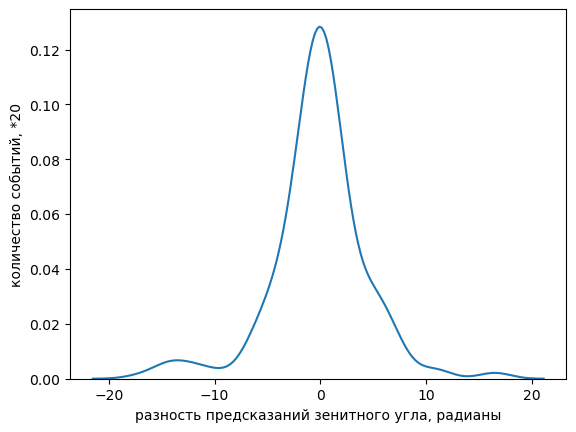

In [32]:
sb.kdeplot((y_theta - x_theta))
plt.ylabel("количество событий, *20")
plt.xlabel("разность предсказаний зенитного угла, радианы")

Text(0.5, 0, 'разность предсказаний азимутального угла, радианы')

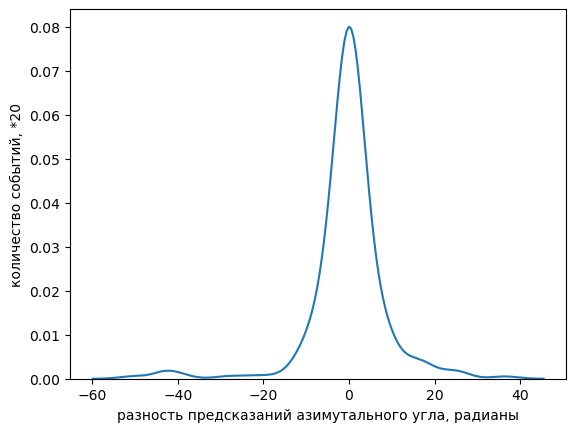

In [33]:
sb.kdeplot((y_phi - x_phi))
plt.ylabel("количество событий, *20")
plt.xlabel("разность предсказаний азимутального угла, радианы")

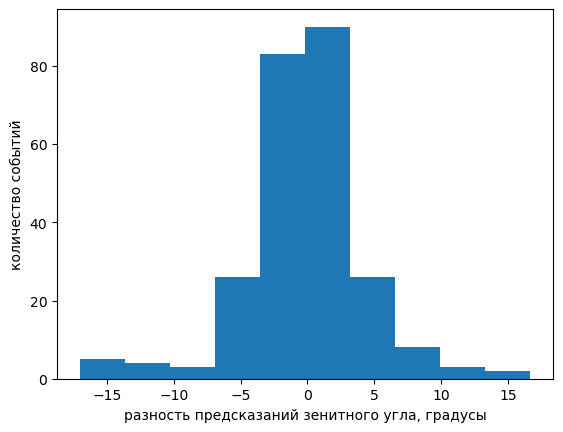

In [34]:
plt.hist((y_theta - x_theta))
plt.ylabel("количество событий")
plt.xlabel("разность предсказаний зенитного угла, градусы")
plt.show()

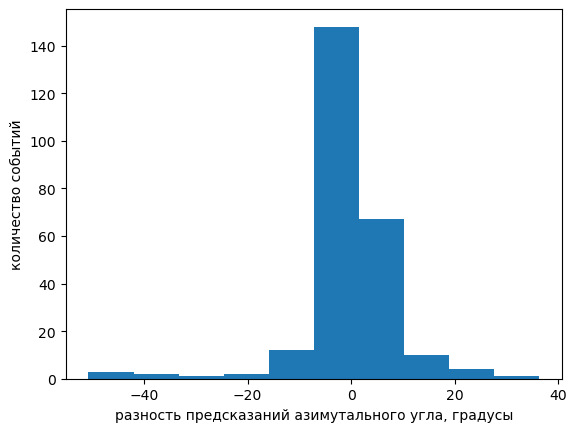

In [35]:
plt.hist((y_phi - x_phi))
plt.ylabel("количество событий")
plt.xlabel("разность предсказаний азимутального угла, градусы")
plt.show()

In [36]:
(y_phi-x_phi).mean()

-0.18158571424675587

In [37]:
(y_theta-x_theta).mean()

-0.15974967534290338

Text(0.5, 0, 'разность предсказания угла, градусы')

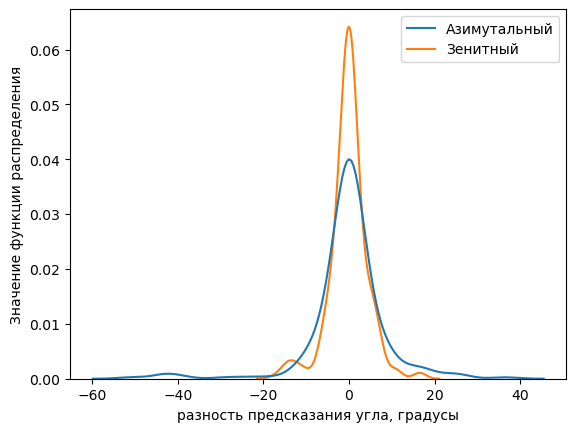

In [38]:
sb.kdeplot({'Азимутальный': (y_phi - x_phi),
           'Зенитный': (y_theta - x_theta)}, cumulative=False)
plt.ylabel("Значение функции распределения")
plt.xlabel("разность предсказания угла, градусы")

In [39]:
np.std(y_phi - x_phi)

9.174530709831153

In [40]:
np.std(y_theta - x_theta)

4.473235097068585

In [41]:
y_df = np.zeros(shape=(len(df_y), 3))

for i in range(len(df_y)):
    y_df[i] = to_spherical(np.array(df_y.iloc[i]))

y_theta_df = np.zeros(shape=(len(df_y)))
y_phi_df = np.zeros(shape=(len(df_y)))

for i in range(len(df_y)):
    y_theta_df[i] = y_df[i][1]
    y_phi_df[i] = y_df[i][2]

In [42]:
ymt = y_theta_df.mean()
ymt

61.83526349995823

In [43]:
y_theta_df.max()

84.43822102364032

In [44]:
ymp = y_phi_df.mean()
ymp

34.58703149244091

In [45]:
y_phi_df.min()

-45.53715926998277

In [46]:
tst = (np.abs(y_phi - x_phi)/np.abs(x_phi))
tst[tst < 1.0].mean()

0.18088749799154638

In [47]:
(np.abs(y_theta - x_theta)/np.abs(x_theta)).mean()

0.08044135284058346

In [48]:
from scipy.stats import shapiro
from scipy.stats import normaltest

In [49]:
shapiro(y_phi - x_phi)

ShapiroResult(statistic=0.7541794776916504, pvalue=5.007388502902272e-19)

In [50]:
shapiro(y_theta - x_theta)

ShapiroResult(statistic=0.920789897441864, pvalue=2.8220070724671587e-10)

In [51]:
normaltest(y_phi - x_phi)

NormaltestResult(statistic=122.09558949160669, pvalue=3.070998536905939e-27)

In [52]:
normaltest(y_theta - x_theta)

NormaltestResult(statistic=31.835318063536285, pvalue=1.221936162482125e-07)

In [64]:
tmp = (y_phi - x_phi)
tmp = tmp[np.abs(tmp) < 30.0]
tmp = pd.DataFrame(tmp, columns=["Азимутальный угол"])
tmp

,Азимутальный угол
0,-17.817795
1,1.524581
2,6.766286
3,0.389563
4,7.916436
...,...
239,0.607714
240,-1.260655
241,-2.222229
242,-6.664933


Text(0, 0.5, 'Разность предсказанных и истинных значений')

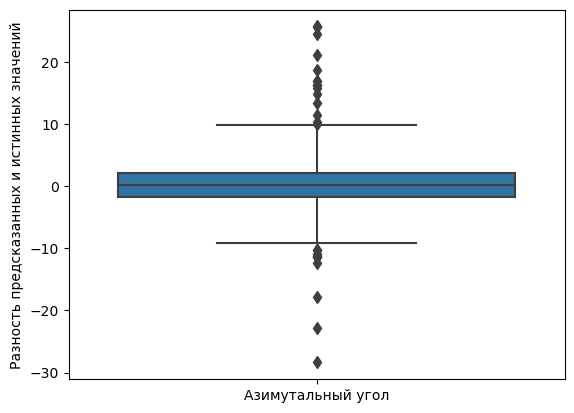

In [65]:
sb.boxplot(tmp, whis=2.0, fliersize=6)
plt.ylabel("Разность предсказанных и истинных значений")

In [66]:
tmp = (y_theta - x_theta)
tmp = tmp[np.abs(tmp) < 30.0]
tmp = pd.DataFrame(tmp, columns=["Зенитный угол"])
tmp

,Зенитный угол
0,-6.695913
1,-0.346215
2,-2.680127
3,1.624772
4,3.095481
...,...
245,1.481212
246,-2.005487
247,-13.210137
248,-5.902734


Text(0, 0.5, 'Разность предсказанных и истинных значений')

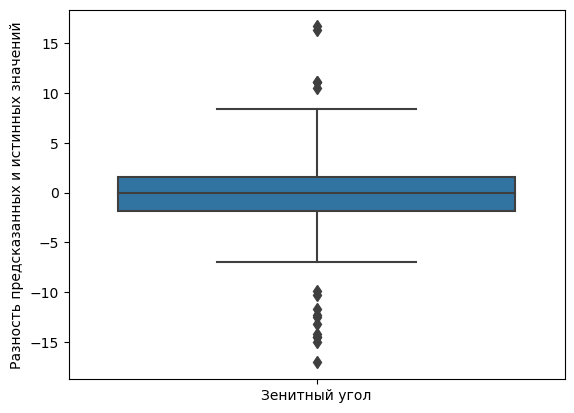

In [67]:
sb.boxplot(tmp, whis=2.0, fliersize=6)
plt.ylabel("Разность предсказанных и истинных значений")